In [1]:
import numpy as np
import pickle
from scipy.stats import pearsonr
import sys

%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

sys.path.append('../')
import scripts.outliers as outliers
import scripts.utils_spatial as utils_spatial

In [2]:
#X_list, Y, Yaudio = pickle.load(open('../data/lda_data_melodia_8.pickle','rb'))
X_list, Y, Yaudio = pickle.load(open('../data/lda_data_melodia_8_30sec.pickle','rb'))
ddf = outliers.load_metadata(Yaudio, metadata_file='../data/metadata.csv')
w, data_countries = utils_spatial.get_neighbors_for_countries_in_dataset(Y)
w_dict = utils_spatial.from_weights_to_dict(w, data_countries)
Xrhy, Xmel, Xmfc, Xchr = X_list
X = np.concatenate((Xrhy, Xmel, Xmfc, Xchr), axis=1)

/homes/mp305/anaconda/lib/python2.7/site-packages/pysal/weights/weights.py:189: UserWarning: There are 21 disconnected observations
  warnings.warn("There are %d disconnected observations" % ni)
/homes/mp305/anaconda/lib/python2.7/site-packages/pysal/weights/weights.py:190: UserWarning: Island ids: 3, 6, 26, 35, 39, 45, 52, 61, 62, 66, 77, 85, 94, 97, 98, 102, 103, 107, 110, 120, 121
  warnings.warn("Island ids: %s" % ', '.join(str(island) for island in self.islands))


Antigua and Barbuda
Australia
Cuba
Fiji
French Polynesia
Grenada
Iceland
Jamaica
Japan
Kiribati
Malta
New Zealand
Philippines
Puerto Rico
Republic of Serbia
Saint Lucia
Samoa
Solomon Islands
South Korea
The Bahamas
Trinidad and Tobago


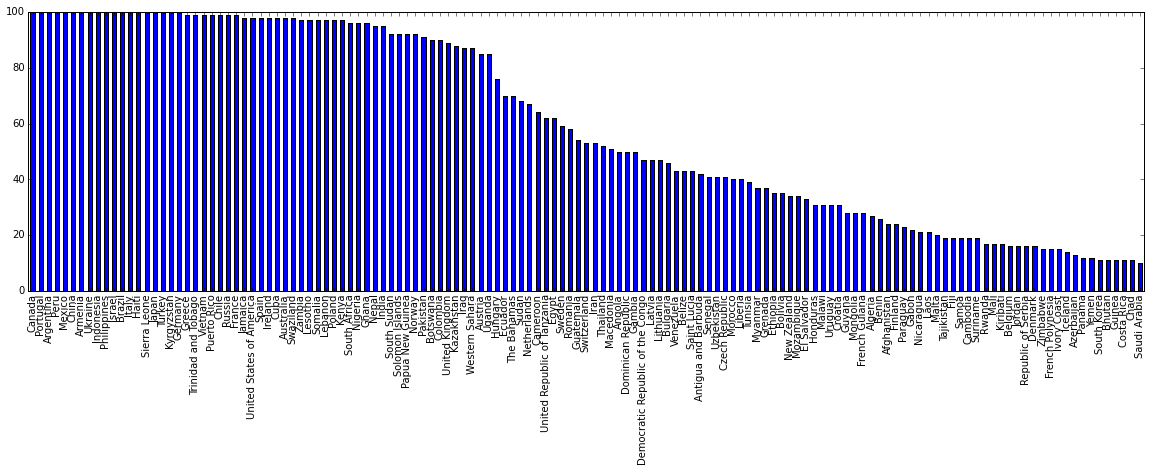

In [3]:
import pandas as pd
df_country = pd.DataFrame(data=Y, columns=['country'])
plt.figure(figsize=(20, 5))
df_country['country'].value_counts().plot(kind='bar');

In [4]:
# global outliers
df_global, threshold, MD = outliers.get_outliers_df(X, Y, chi2thr=0.999)
outliers.print_most_least_outliers_topN(df_global, N=10)

most outliers 
           Country  Outliers  N_Country  N_Outliers
136       Botswana  0.611111         90          55
72     Ivory Coast  0.600000         15           9
95            Chad  0.545455         11           6
43           Benin  0.538462         26          14
86          Gambia  0.500000         50          25
20        Pakistan  0.494505         91          45
106          Nepal  0.473684         95          45
78     El Salvador  0.454545         33          15
64      Mozambique  0.441176         34          15
135  French Guiana  0.428571         28          12
least outliers 
            Country  Outliers  N_Country  N_Outliers
1         Lithuania  0.000000         47           0
119         Denmark  0.000000         16           0
27      South Korea  0.000000         11           0
120      Kazakhstan  0.011364         88           1
31   Czech Republic  0.024390         41           1
15      Netherlands  0.029851         67           2
30      Afghanistan  0.041

0.659755286693 1.82581829601e-18


/homes/mp305/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


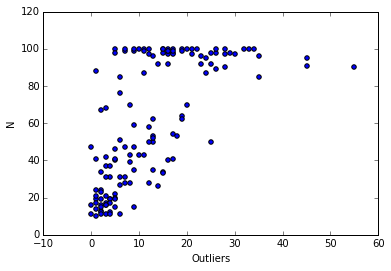

In [5]:
corr, pval = pearsonr(df_global['N_Outliers'], df_global['N_Country'])
print corr, pval

plt.scatter(df_global['N_Outliers'], df_global['N_Country'])
plt.xlabel('Outliers')
plt.ylabel('N')

-0.0102335874359 0.905523601988


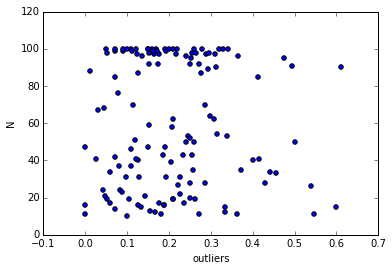

In [8]:
corr, pval = pearsonr(df_global['Outliers'], df_global['N_Country'])
print corr, pval

plt.scatter(df_global['Outliers'], df_global['N_Country'])
plt.xlabel('Outliers')
plt.ylabel('N')

In [9]:
feat = [Xrhy, Xmel, Xmfc, Xchr]
feat_labels = ['rhy', 'mel', 'mfc', 'chr']
tabs_feat = []
for i in range(len(feat)):
    XX = feat[i]
    df_feat, threshold, MD = outliers.get_outliers_df(XX, Y, chi2thr=0.999)
    outliers.print_most_least_outliers_topN(df_feat, N=5)

most outliers 
      Country  Outliers  N_Country  N_Outliers
43      Benin  0.500000         26          13
136  Botswana  0.488889         90          44
106     Nepal  0.421053         95          40
84     Belize  0.418605         43          18
19      Yemen  0.416667         12           5
least outliers 
                Country  Outliers  N_Country  N_Outliers
28           Tajikistan         0         19           0
119             Denmark         0         16           0
96              Uruguay         0         31           0
25   Republic of Serbia         0         16           0
27          South Korea         0         11           0
most outliers 
      Country  Outliers  N_Country  N_Outliers
117  Zimbabwe  0.533333         15           8
96    Uruguay  0.483871         31          15
68     Guinea  0.454545         11           5
63    Senegal  0.390244         41          16
86     Gambia  0.380000         50          19
least outliers 
              Country  Outliers 

In [14]:
import sys
sys.path.append('../')
import scripts.utils as utils
from collections import Counter
#spatial_outliers = utils.get_local_outliers_from_neighbors_dict(X, Y, w_dict, chi2thr=0.999, do_pca=True)
spatial_counts = Counter(dict([(ll[0],ll[1]) for ll in spatial_outliers]))
df_local = outliers.country_outlier_df(spatial_counts, Y, normalize=True)
outliers.print_most_least_outliers_topN(df_local, N=10)

most outliers 
                         Country  Outliers  N_Country  N_Outliers
64                    Mozambique  0.382353         34          13
117                     Zimbabwe  0.333333         15           5
27                         Kenya  0.288660         97          28
67                        Brazil  0.270000        100          27
76                          Iran  0.264151         53          14
30                        Turkey  0.240000        100          24
65                        Uganda  0.211765         85          18
4                       Ethiopia  0.200000         35           7
126                  South Sudan  0.195652         92          18
91   United Republic of Tanzania  0.193548         62          12
least outliers 
             Country  Outliers  N_Country  N_Outliers
0             Canada         0        100           0
94              Iraq         0         87           0
93           Grenada         0         37           0
90  French Polynesia       